In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [25]:
qubit_states_nans_perlog = np.load('2024_10_15_measurement_events_1CNOT_XX.npy').transpose(1,2,0).astype(float)
qubit_states_nans_perlog[qubit_states_nans_perlog == 2.] = 1#np.nan
qubit_states_nans_perlog[qubit_states_nans_perlog == 0.] = -1
qubit_states_nans_perlog.shape

(2, 73, 2337)

In [26]:
num_ancillas = 24
num_logicals = 2
num_rounds = 3
num_datas = 25
d=5
decoder_basis = 'XX'
perfect_reps = np.ones(qubit_states_nans_perlog.shape[-1])

stabilizer_weights = np.zeros(num_ancillas)
stabilizer_masks = np.zeros((num_ancillas, num_datas), dtype = bool)

ancilla_Astabs_mask = Zstabs_mask =  np.array([1,1,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,1], dtype = bool) 
ancilla_Bstabs_mask = Xstabs_mask = (1-ancilla_Astabs_mask).astype(bool)

deterministic_rounds = np.ones(num_rounds).astype(bool)
nondeterministic_rounds = np.array([0] + (num_rounds - 2)*[1] + [0]).astype(bool)


### HARDCODE FOR NOW
stabilizer_weights = np.array([2., 2., 4., 4., 4., 4., 2., 2., 4., 4., 4., 4., 4., 4., 4., 4., 2.,
       2., 4., 4., 4., 4., 2., 2.])
stabilizer_masks = np.array([[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]]).astype(bool)


stab2A = (ancilla_Astabs_mask & (stabilizer_weights == 2))
stab2B = (ancilla_Bstabs_mask & (stabilizer_weights == 2))
stab4A = (ancilla_Astabs_mask & (stabilizer_weights == 4))
stab4B = (ancilla_Bstabs_mask & (stabilizer_weights == 4))


vertical_string_masks = np.zeros((d,num_datas)).astype(bool)
horizontal_string_masks = np.zeros((d,num_datas)).astype(bool)

for i in range(d):
    vertical_string_masks[i,i::d] = True
    horizontal_string_masks[i,i*d:d*(i+1)] = True


prep_basis = ['horizontal','vertical'] # basis in which each logical is prepared; 'horizontal' = X, 'vertical' = Z
# decoder_basis = 'XX' # basis in which each logical is measured
num_detectors = 2*num_logicals+2*num_logicals*(num_rounds - 2)

X_detector_mask = [True]*3
Z_detector_mask = [True]*3
if decoder_basis[0] == 'X':
    X_detector_mask += [True]
    Z_detector_mask += [False]
else:
    X_detector_mask += [False]
    Z_detector_mask += [True]
    
if decoder_basis[1] == 'X':
    X_detector_mask += [True]
    Z_detector_mask += [False]  
else:
    X_detector_mask += [False]
    Z_detector_mask += [True]  

In [27]:
Xdetectors_per_round = []
Zdetectors_per_round = []

### First round detector is the product of stabilizers between the two logicals, both X and Z stabs. 
detector_firstround = np.prod(qubit_states_nans_perlog[:,:num_ancillas],axis = 0)
Xdetectors_per_round.append(detector_firstround[Xstabs_mask])
Zdetectors_per_round.append(detector_firstround[Zstabs_mask])

### Second set of detectors for the control (1) and target (2) logicals, between ancilla measurements
detector_Xcontrol = qubit_states_nans_perlog[0,:num_ancillas] * qubit_states_nans_perlog[1,:num_ancillas]* qubit_states_nans_perlog[0,num_ancillas:2*num_ancillas]
detector_Zcontrol = qubit_states_nans_perlog[0,:num_ancillas] * qubit_states_nans_perlog[0,num_ancillas:2*num_ancillas]
Xdetectors_per_round.append(detector_Xcontrol[Xstabs_mask])
Zdetectors_per_round.append(detector_Zcontrol[Zstabs_mask])

detector_Xtarget = qubit_states_nans_perlog[1,:num_ancillas] * qubit_states_nans_perlog[1,num_ancillas:2*num_ancillas]
detector_Ztarget = qubit_states_nans_perlog[1,:num_ancillas] * qubit_states_nans_perlog[0,:num_ancillas] * qubit_states_nans_perlog[1,num_ancillas:2*num_ancillas] 
Xdetectors_per_round.append(detector_Xtarget[Xstabs_mask])
Zdetectors_per_round.append(detector_Ztarget[Zstabs_mask])

### Final set of detectors (half of which will not be actually the ones measured in the given measurement basis)
control_stabilizers = np.array([np.prod(qubit_states_nans_perlog[0,-num_datas:][stabilizer_masks[i]],axis = 0) for i in range(num_ancillas)])
target_stabilizers = np.array([np.prod(qubit_states_nans_perlog[1,-num_datas:][stabilizer_masks[i]],axis = 0) for i in range(num_ancillas)])

detector_Xcontrol = qubit_states_nans_perlog[0,num_ancillas:2*num_ancillas] * qubit_states_nans_perlog[1,num_ancillas:2*num_ancillas] * control_stabilizers
detector_Zcontrol = qubit_states_nans_perlog[0,num_ancillas:2*num_ancillas] * control_stabilizers
Xdetectors_per_round.append(detector_Xcontrol[Xstabs_mask])
Zdetectors_per_round.append(detector_Zcontrol[Zstabs_mask])

detector_Xtarget = qubit_states_nans_perlog[1,num_ancillas:2*num_ancillas] * target_stabilizers
detector_Ztarget = qubit_states_nans_perlog[1,num_ancillas:2*num_ancillas] * qubit_states_nans_perlog[0,num_ancillas:2*num_ancillas] * target_stabilizers
Xdetectors_per_round.append(detector_Xtarget[Xstabs_mask])
Zdetectors_per_round.append(detector_Ztarget[Zstabs_mask])

Xdetectors_per_round = np.array(Xdetectors_per_round)
Zdetectors_per_round = np.array(Zdetectors_per_round)

In [28]:
### Calculate detectors from qubit states, and reorder for the decoding
detector_measurements_all = np.zeros((num_detectors,num_ancillas//2, *perfect_reps.shape))
detector_measurements_all[:num_detectors - num_logicals:2] = Xdetectors_per_round[:3]
detector_measurements_all[1:num_detectors - num_logicals:2] = Zdetectors_per_round[:3]
detector_measurements_all[-2] = Xdetectors_per_round[-2] if X_detector_mask[-2] else Zdetectors_per_round[-2]
detector_measurements_all[-1] = Xdetectors_per_round[-1] if X_detector_mask[-2] else Zdetectors_per_round[-1]
detector_measurements = np.reshape(detector_measurements_all,(-1,perfect_reps.shape[0]))

# Convert no flip +1 -> False (0), and flip -1 -> True (1)
detector_measurements_nans = detector_measurements.copy()
detector_measurements[detector_measurements == +1] = 0 
detector_measurements[detector_measurements == -1] = 1
detector_measurements = np.nan_to_num(detector_measurements, nan = 2).astype(int)
detection_events_signs = np.sign(np.nanmean(detector_measurements_nans,axis = -1))

print(np.mean(detector_measurements, axis=0))

[0.46875    0.39583333 0.48958333 ... 0.51041667 0.40625    0.45833333]


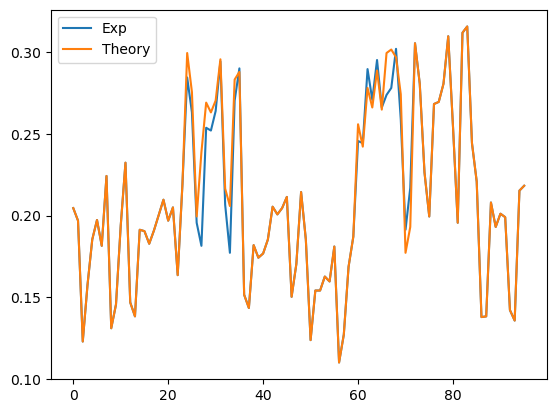

In [29]:
plt.plot((1-np.nanmean(detector_measurements_nans*np.sign(np.nanmean(detector_measurements_nans,axis = -1))[:,None], axis = -1))/2, label = 'Exp')
simulated_detector_CX_3 = np.array([0.276, 0.257, 0.188, 0.231, 0.246, 0.252, 0.244, 0.269, 0.2,
                                    0.209, 0.246, 0.265, 0.196, 0.205, 0.239, 0.249, 0.26,
                                    0.245, 0.267, 0.269, 0.237, 0.225, 0.223, 0.206,
                                    0.351, 0.357, 0.275, 0.283, 0.339, 0.324, 0.35, 0.388, 0.276, 0.329, 0.378, 0.325,
                                   0.182, 0.2, 0.243, 0.243, 0.27, 0.223, 0.264, 0.259, 0.239, 0.234, 0.171, 0.191, 0.277, 0.272, 0.2,
0.227, 0.287, 0.245, 0.277, 0.262, 0.199, 0.215, 0.268, 0.245, 0.291, 0.274, 0.362, 0.334, 0.358, 0.326, 0.365, 0.351, 0.341, 0.336, 0.283, 0.263,
0.325, 0.329, 0.306, 0.28, 0.357, 0.337, 0.306, 0.371, 0.287, 0.276, 0.353, 0.336, 0.198, 0.223, 0.168, 0.158, 0.219, 0.201, 0.187, 0.231, 0.175, 0.132, 0.268, 0.232])
simulated_detector_CX_3 = np.array([0.20453572956782198, 0.19683354728284125, 0.12280701754385964, 0.157466837826273, 0.18528027385537013, 0.1972614462986735, 0.18142918271287975, 0.22421908429610612, 0.13093709884467267, 0.14548566538296961, 0.19383825417201542, 0.23234916559691912, 0.1467693624304664, 0.13821138211382114, 0.19127086007702182, 0.1904150620453573, 0.18271287976037656, 0.19084296106118956, 0.20025673940949937, 0.20967051775780915, 0.19683354728284125, 0.20496362858365424, 0.16345742404792468, 0.21908429610611896, 0.2995293110825845, 0.27556696619597776, 0.19940094137783482, 0.23876765083440307, 0.2691484809584938, 0.2631578947368421, 0.27043217800599056, 0.29567821994009413, 0.21651690201112536, 0.2058194266153188, 0.2832691484809585, 0.28797603765511337, 0.1514762516046213, 0.1433461703038083, 0.181857081728712, 0.17415489944373128, 0.17672229353872487, 0.18528027385537013, 0.20539152759948653, 0.20068463842533163, 0.20453572956782198, 0.21138211382113822, 0.15019255455712452, 0.1703038083012409, 0.21437740693196405, 0.18528027385537013, 0.12366281557552418, 0.1540436456996149, 0.1540436456996149, 0.16260162601626016, 0.15960633290543433, 0.1810012836970475, 0.10997004706889174, 0.12708600770218229, 0.16859221223791185, 0.18699186991869918, 0.2558836114676936, 0.2421908429610612, 0.2781343602909713, 0.26615318784766795, 0.2888318356867779, 0.26486949080017114, 0.2995293110825845, 0.30166880616174585, 0.29696191698759095, 0.27428326914848095, 0.17715019255455713, 0.19298245614035087, 0.3055198973042362, 0.2807017543859649, 0.22635857937526743, 0.19940094137783482, 0.2682926829268293, 0.26957637997432604, 0.2807017543859649, 0.30979888746255885, 0.25459991442019686, 0.19554985023534446, 0.3119383825417201, 0.3157894736842105, 0.2443303380402225, 0.220795892169448, 0.13778348309798888, 0.13821138211382114, 0.2079589216944801, 0.19298245614035087, 0.2011125374411639, 0.19897304236200256, 0.14206247325631152, 0.13564398801882754, 0.21523320496362858, 0.21822849807445444])
plt.plot(simulated_detector_CX_3, label = 'Theory')
plt.legend()

In [23]:
1-np.nanmean((1+detector_measurements_nans * np.sign(np.nanmean(detector_measurements_nans, axis = -1))[:,None])/2)

0.19963272001141064

In [24]:
detector_measurements_nans * np.sign(np.nanmean(detector_measurements_nans, axis = -1))[:,None]

array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ..., -1.,  1., -1.],
       [ 1.,  1.,  1., ...,  1., -1.,  1.],
       ...,
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1., -1.],
       [ 1., -1.,  1., ...,  1.,  1.,  1.]])